In [1]:
import numpy as np
from bisect import bisect_left
import matplotlib.pyplot as plt
import lensinggw.constants.constants as const

from wolensing.utils.utils import smooth

In [2]:
GCSM = 2.47701878*1.98892*10**(-6) # G/c^3 *solar mass

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### Import data

In [9]:
ws = np.loadtxt('./data/test/test_sis_ws.txt')
Fws = np.loadtxt('./data/test/test_sis_Fws.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})/scale

In [10]:
fs=ws/(2*np.pi)

# smoothen the curve(s)
from scipy.signal import savgol_filter
Fa_fil = savgol_filter(np.abs(Fws), 51, 3)
Fp_fil = savgol_filter(np.angle(Fws), 51, 3)

### Plot the absolute value of F(f)

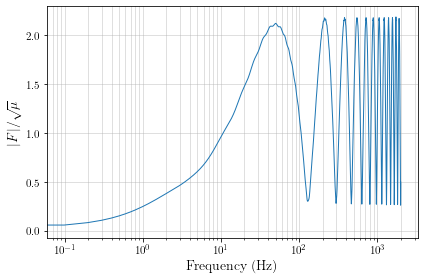

In [13]:
# set the upper limit of the curve 
fig, ax = plt.subplots()
i = bisect_left(fs, 2000)
ax.semilogx(fs[:i], Fa_fil[:i], linewidth=1, label = r'$M_\odot$')
ax.set_xlabel(r'Frequency (Hz)', fontsize = 14)
ax.set_ylabel(r'$|F|/\sqrt{\mu}$', fontsize = 14)

ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(which = 'both', alpha = 0.5)

fig.tight_layout()

### Plot the phase of F(f)

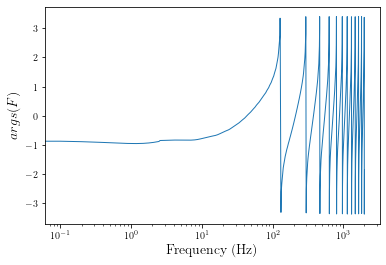

In [15]:
fig1, ax1 = plt.subplots()
ax1.semilogx(fs[:i], Fp_fil[:i], linewidth=1, label = r'$M_\odot$')
ax1.set_ylabel(r'$args(F)$', fontsize = 14)
ax1.set_xlabel(r'Frequency (Hz)', fontsize = 14)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(which = 'both', alpha = 0.5)

fig.tight_layout()